## **Lab Assignment-5 Time Series Forecasting using LSTM**

## Name: Manavi Pawar

## PRN: 202201040050

## Date: 14-04-2025

## Batch: T3

## Group Members: Kanishka Garud, Sakshi Dube, Shravani Sakore.

# **Experiment 5.1: Time Series Forecasting using LSTM**

### Objective:
### To forecast future values of a univariate time series using LSTM-based models.
## Dataset: Airline Passengers

### Expected Outcome:

Prediction vs actual plot

RMSE/MAE values

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0731 - val_loss: 0.0447
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0227 - val_loss: 0.0349
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - val_loss: 0.0645
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0116 - val_loss: 0.0285
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0075 - val_loss: 0.0228
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0073 - val_loss: 0.0286
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0079 - val_loss: 0.0227
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0070 - val_loss: 0.0237
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0080 - val_loss: 0.0235
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068 - val_loss: 0.0227
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0069 - val_loss: 0.0227
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0076 - val_lo

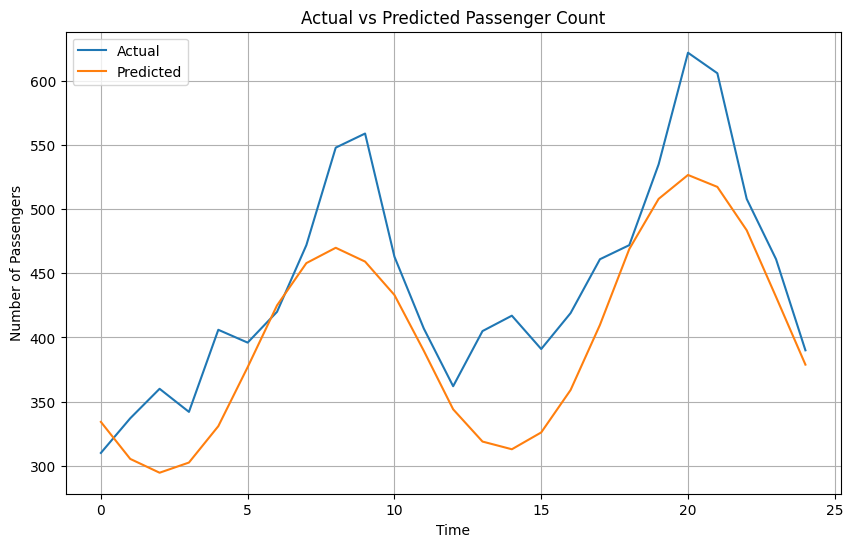

RMSE: 56.29, MAE: 46.50


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=[1])
df.columns = ['Passengers']

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_dataset(data, time_step=20):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 20
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert scaling
train_predict_inv = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict_inv = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot prediction vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predict_inv, label='Predicted')
plt.title("Actual vs Predicted Passenger Count")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))
mae = mean_absolute_error(y_test_inv, test_predict_inv)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


# **Experiment 5.2: Sequence Text Prediction using LSTM**

### Objective:
### To generate next characters/words based on a given input sequence using LSTM.

### Expected Outcome:

Auto-generated text samples

Training accuracy/loss plots



Total sequences: 158


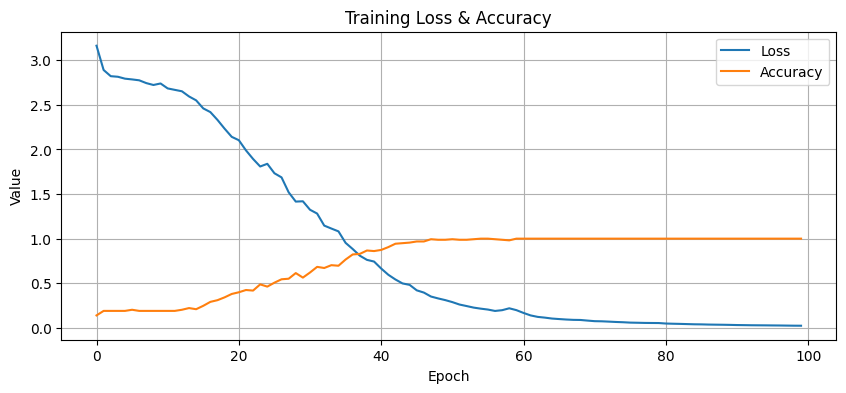


Generated Text:

to be, or not to be, that is the queon hetthr rioofeer hr   ii  oo ts  a  sss       noon  to uuer  rbbleeeeeeeee   f t t uussse   ss n  oii tn   tosstu  ssseess ses oon  to  ooe la aaaaassstt esssaaeese lo ssn tiis   t  to  aee         


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import re

# 1. Load and clean Shakespeare sample text
text = """
To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take arms against a sea of troubles
And by opposing end them.
"""
text = text.lower()
text = re.sub(r'[^a-zA-Z .,!?\'\"]+', ' ', text)

# 2. Create character to integer mapping
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for c, i in char_to_int.items()}

# 3. Create sequences
seq_length = 40
step = 1
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i:i+seq_length])
    next_chars.append(text[i + seq_length])

print("Total sequences:", len(sequences))

# 4. Encode sequences
X = np.zeros((len(sequences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sequences), len(chars)), dtype=np.bool_)

for i, seq in enumerate(sequences):
    for t, char in enumerate(seq):
        X[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

# 5. Build LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train
history = model.fit(X, y, batch_size=8, epochs=100, verbose=0)

# 7. Plot loss/accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Loss & Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 8. Text Generation Function
def generate_text(seed_text, length=200):
    generated = seed_text.lower()
    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)), dtype=np.bool_)
        for t, char in enumerate(seed_text):
            if char in char_to_int:
                x_pred[0, t, char_to_int[char]] = 1
        pred = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(pred)
        next_char = int_to_char[next_index]

        generated += next_char
        seed_text = seed_text[1:] + next_char
    return generated

# 9. Example text generation
seed_text = "to be, or not to be, that is the que"
print("\nGenerated Text:\n")
print(generate_text(seed_text))


## **Experiment 5.3: Sequence Text Classification using LSTM**

###  Objective:
### To classify text sequences using LSTM-based models

### Expected Outcome:

Classification metrics: accuracy, precision, F1-score

Confusion matrix visualization

Sample Data:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - accuracy: 0.8440 - loss: 0.3948 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.9857 - loss: 0.0577 - val_accuracy: 0.9874 - val_loss: 0.0386
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.9933 - loss: 0.0266 - val_accuracy: 0.9919 - val_loss: 0.0340
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.9956 - loss: 0.0213 - val_accuracy: 0.9901 - val_loss: 0.0355
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.9977 - loss: 0.0115 - val_accuracy: 0.9937 - val_loss: 0.0321


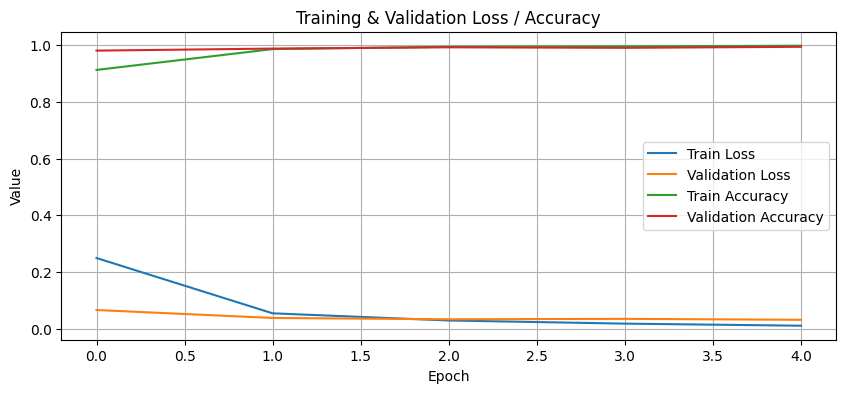

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step

Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       966
        Spam       0.99      0.97      0.98       149

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115



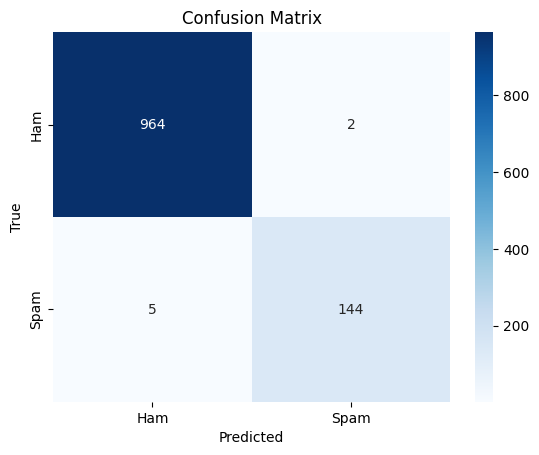

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=["label", "message"])
print("Sample Data:\n", df.head())

# 2. Encode Labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Text Tokenization and Padding
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(df['message'].values)
X = tokenizer.texts_to_sequences(df['message'].values)
X = pad_sequences(X, maxlen=max_len)

y = df['label'].values

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# 7. Plot Accuracy and Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Loss / Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 8. Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Evaluation Metrics Details and discussion**

Experiment 5.1  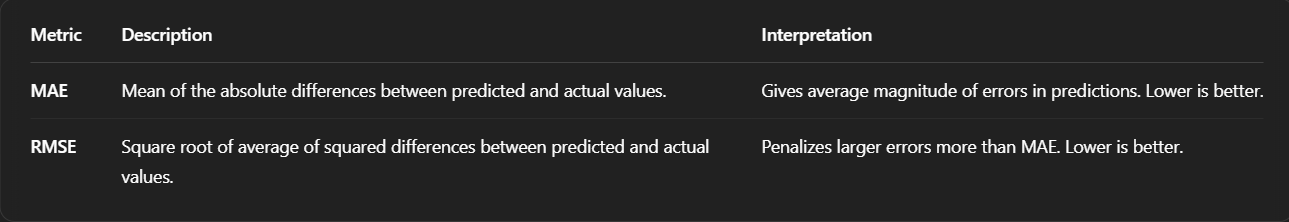

Experiment 5.2

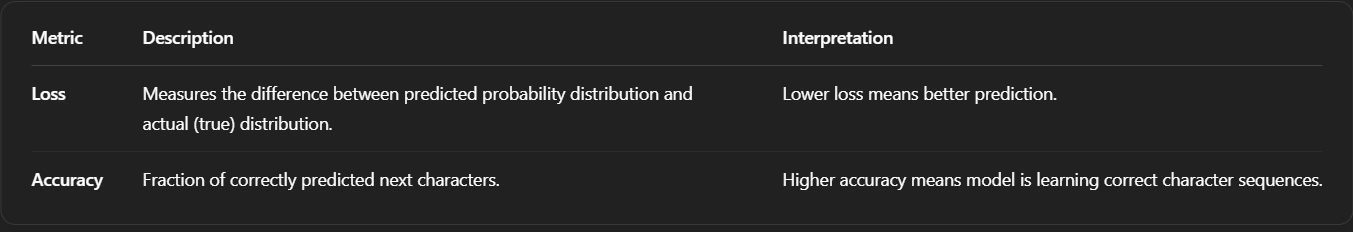

Experiment 5.3
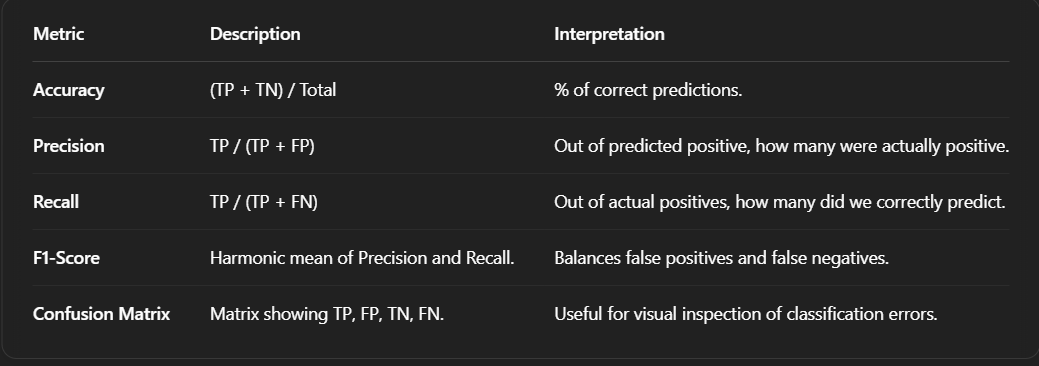

**Dataset**

Experiment 5.1 - Airline Passengers

Experiment 5.2 - Shakespeare’s Text

Experiment 5.3 - SMS Spam Collection Dataset

**Declaration**

I, Manavi Pawar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

Signature: Manavi Pawar